         Date     Open     High      Low    Close   Volume  Unnamed: 6  \
0  29-Mar-2019  1661.0  1714.90  1661.00  1703.10  1026220         NaN   
1  28-Mar-2019  1669.9  1699.00  1641.50  1654.55  1681103         NaN   
2  27-Mar-2019  1706.0  1720.00  1661.05  1665.90   460961         NaN   
3  26-Mar-2019  1710.0  1774.95  1686.65  1707.85   509657         NaN   
4  25-Mar-2019  1659.8  1710.00  1651.10  1705.75   684585         NaN   

   Unnamed: 7  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  

****
             Date      Open    High      Low    Close  Volume  Unnamed: 6  \
2717  07-Apr-2008  1261.00  1309.9  1250.00  1283.90   57447         NaN   
2718  04-Apr-2008  1258.00  1275.0  1241.00  1265.35   67729         NaN   
2719  03-Apr-2008  1250.00  1280.0  1230.00  1257.60   29742         NaN   
2720  02-Apr-2008  1263.65  1300.0  1251.00  1256.95   58781         NaN   
2721  01-Apr-2008  1294.00  1298.0  1219.95  1238.45   64324         NaN

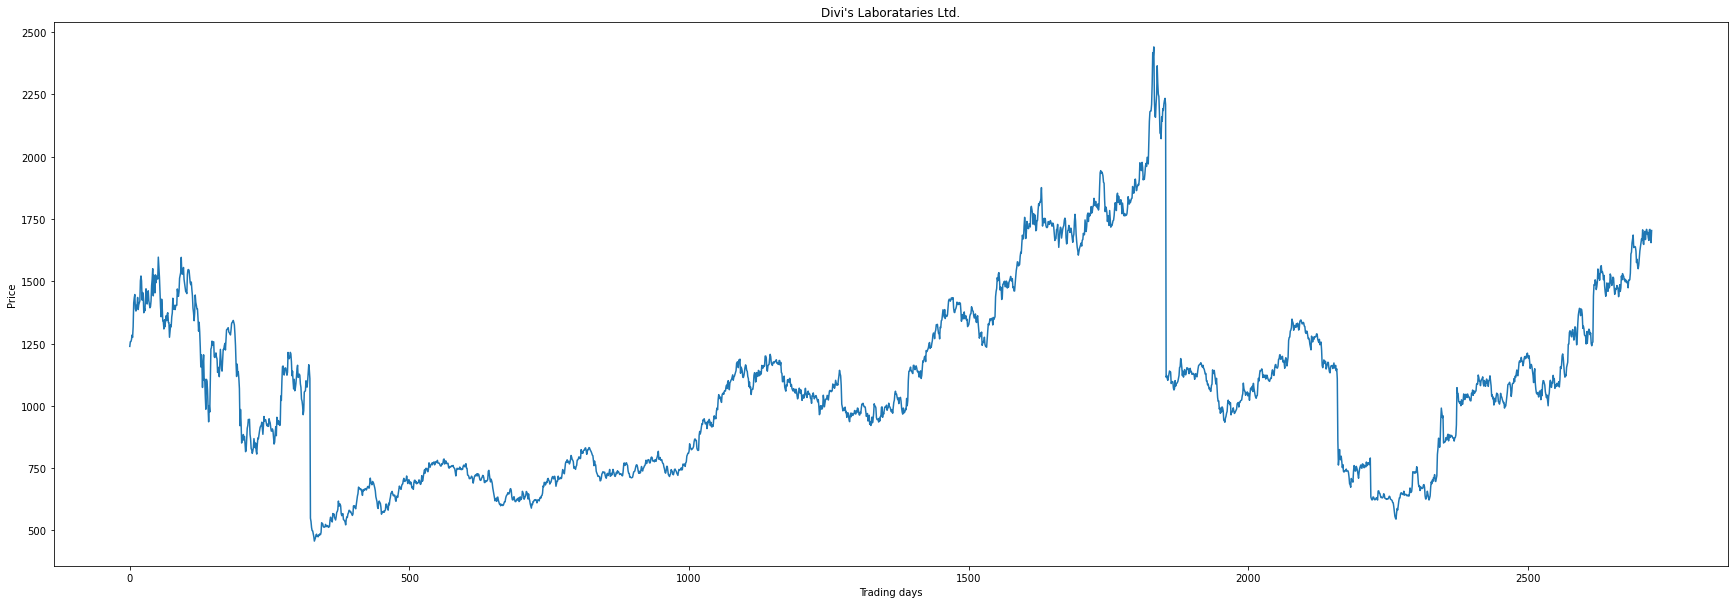

In [2]:
import numpy as np
import pandas as pd

df = pd.read_excel("/home/shravan/Desktop/Datasets/pharma/divi/divi.xlsx")

print(df.head())
print("\n****\n",df.tail())

print("_________________________________________________________\n\nOPEN \n\tAverage : ",np.mean(df.loc[:]['Open']),"\n\tMaximum : ", np.max(df['Open']),"\n\tMinimum : ", np.min(df['Open']),"\n\tStandard Deviation : ", np.std(df['Open']))
print("\n\nHIGH \n\tAverage : ",np.mean(df.loc[:]['High']),"\n\tMaximum : ", np.max(df['High']),"\n\tMinimum : ", np.min(df['High']),"\n\tStandard Deviation : ", np.std(df['High']))
print("\n\nLOW \n\tAverage : ",np.mean(df.loc[:]['Low']),"\n\tMaximum : ", np.max(df['Low']),"\n\tMinimum : ", np.min(df['Low']),"\n\tStandard Deviation : ", np.std(df['Low']))
print("\n\nCLOSE \n\tAverage : ",np.mean(df.loc[:]['Close']),"\n\tMaximum : ", np.max(df['Close']),"\n\tMinimum : ", np.min(df['Close']),"\n\tStandard Deviation : ", np.std(df['Close']))
print("\n\nVOLUME \n\tAverage : ",np.mean(df.loc[:]['Volume']),"\n\tMaximum : ", np.max(df['Volume']),"\n\tMinimum : ", np.min(df['Volume']),"\n\tStandard Deviation : ", np.std(df['Volume']))

def reverse_data(df):
    date = []
    day = []
    open = []
    high = []
    low = []
    close = []
    volume = []
    for i in range(len(df)-1, -1, -1):
        day.append((len(df)-1)-i)
        date.append(df.loc[i]['Date '])
        open.append(df.loc[i]['Open'])
        high.append(df.loc[i]['High'])
        low.append(df.loc[i]['Low'])
        close.append(df.loc[i]['Close'])
        volume.append(df.loc[i]['Volume'])
    stocks = pd.DataFrame()
    stocks['Day'] = day
    stocks['Date'] = date
    stocks['Open'] = open
    stocks['High'] = high
    stocks['Low'] = low
    stocks['Close'] = close
    stocks['Volume'] = volume
    return stocks

stocks = reverse_data(df)

print(stocks.head())
print("\n****\n",stocks.tail())

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (30,10)
fig,ax = plt.subplots()

ax.plot(stocks['Day'],stocks['Close'])
plt.xlabel("Trading days")
plt.ylabel("Price")
plt.title("Divi's Laborataries Ltd.")
plt.show()

   Day         Date      Open      High       Low     Close    Volume
0    0  01-Apr-2008  0.431714  0.411855  0.399290  0.394003  0.003050
1    1  02-Apr-2008  0.416189  0.412846  0.415392  0.403334  0.002781
2    2  03-Apr-2008  0.409207  0.402934  0.404501  0.403662  0.001375
3    3  04-Apr-2008  0.413299  0.400456  0.410206  0.407571  0.003215
4    4  07-Apr-2008  0.414834  0.417753  0.414873  0.416927  0.002717

****
        Day         Date      Open      High       Low     Close    Volume
2717  2717  25-Mar-2019  0.618824  0.616048  0.622880  0.629703  0.033091
2718  2718  26-Mar-2019  0.644501  0.648238  0.641316  0.630763  0.024619
2719  2719  27-Mar-2019  0.642455  0.621004  0.628040  0.609604  0.022260
2720  2720  28-Mar-2019  0.623990  0.610596  0.617902  0.603879  0.081357
2721  2721  29-Mar-2019  0.619437  0.618476  0.628014  0.628367  0.049638


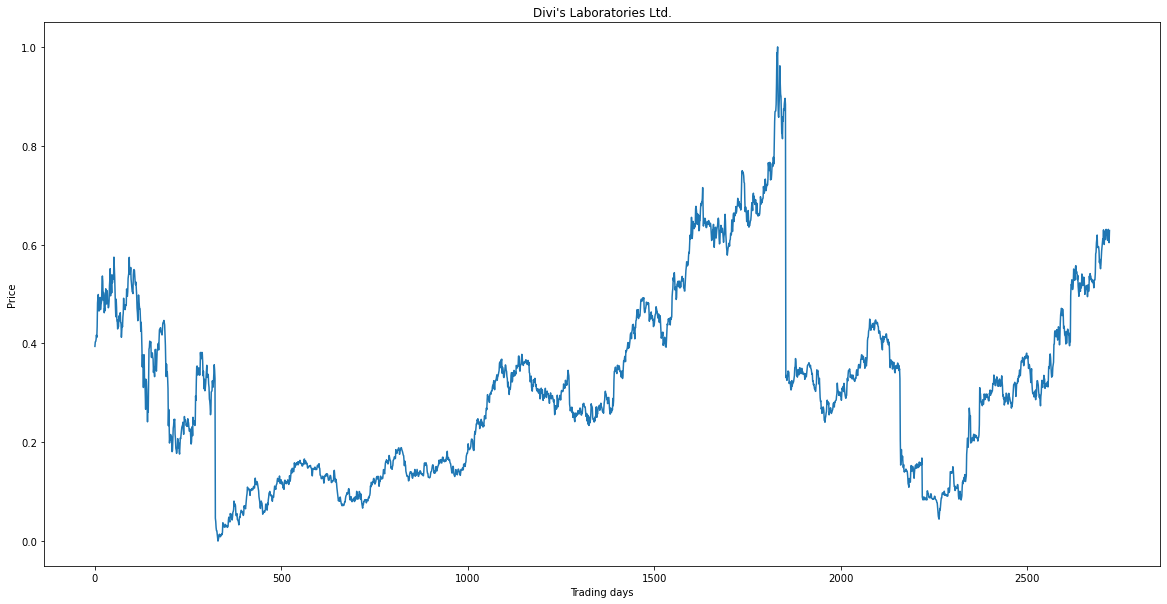

In [3]:
from sklearn.preprocessing import MinMaxScaler

def get_normalised_data(data):
    scaler = MinMaxScaler()
    numerical = ['Open','High','Low','Close','Volume']
    data[numerical] = scaler.fit_transform(data[numerical])
    return data

stocks = get_normalised_data(stocks)

print(stocks.head())
print("\n****\n",stocks.tail())

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20,10)
fig,ax = plt.subplots()

ax.plot(stocks['Day'],stocks['Close'])
plt.xlabel("Trading days")
plt.ylabel("Price")
plt.title("Divi's Laboratories Ltd.")
plt.show()

In [4]:
import math
from IPython.display import display
import time
from keras.layers.core import Dense,Dropout,Activation
from keras.models import Sequential
from keras.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from keras.layers.recurrent import LSTM
from keras.layers.recurrent import GRU
from keras.layers.recurrent import SimpleRNN

#UNROLL_FUNCTION
def unroll(stocks,unroll_length):
    result = []
    for i in range(len(stocks)-unroll_length+1):
        result.append(stocks[i : (i+unroll_length)])
    return np.asarray(result)

#SIMPLERNN_MODEL
def build_model(input_dim,output_dim,return_sequences):
    model = Sequential()
    model.add(SimpleRNN(input_shape = (None,input_dim), units = output_dim, return_sequences = return_sequences))
    model.add(Dropout(0.1))
    model.add(SimpleRNN(units = 100, return_sequences = False))
    model.add(Dense(units = 100))
    model.add(Dense(units = 1))
    model.add(Activation('linear'))
    return model

#LSTM_MODEL
def build_lstm_model(input_dim, output_dim, return_sequences):
    model = Sequential()
    model.add(LSTM(input_shape = (None, input_dim), units = output_dim, return_sequences = return_sequences))
    model.add(LSTM(units = 128, return_sequences = False))
    model.add(Dense(units = 200))
    model.add(Dense(units = 1))
    model.add(Activation('linear'))
    return model


#GRU_MODEL
def build_gru_model(input_dim, output_dim, return_sequences):
    model = Sequential()
    model.add(GRU(input_shape = (None,input_dim), units = output_dim, return_sequences=return_sequences))
    #model.add(Dropout(0.2))
    model.add(GRU(units=128,return_sequences = False))
    #model.add(Dropout(0.2))
    model.add(Dense(units = 200))
    model.add(Dense(units = 1))
    model.add(Activation('linear'))
    return model


def plot_prediction(actual, prediction, title='Divi\'s Laboratories TRADING VS PREDICTIONS', y_label='Price INR', x_label='Trading Days'):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Add labels
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    # Plot actual and predicted close values
    plt.plot(actual, '#00FF00', label='Adjusted Close')
    plt.plot(prediction, '#0000FF', label='Predicted Close')

    # Set title
    ax.set_title(title)
    ax.legend(loc='upper left')
    plt.show()


#RESULT_STAT_FUNCTION
def err_stat(y_test,preds):
    Error = preds - y_test
    print("Standard Deviation of Error : ", np.std(Error))
    stdErr = np.std(Error)
    DstdErr = stdErr * (np.max(df['Close']) - np.min(df['Close']))
    print("Denormalised Standard Deviation : ", DstdErr)
    print("Ratio of Standard Deviation of Error to Standard Deviation of Stock Price : ", DstdErr/np.std(df['Close']))




#####
#TRAIN_TEST_SPLIT
stocks = stocks.drop(['Date','Day'], axis =1)
stocks.head()

def train_test_split(stocks,unroll_length,prediction_size,prediction_time):
    x_test_start = prediction_size + prediction_time + unroll_length - 1
    
    #train data
    x_train = stocks[0 : (-x_test_start - prediction_time)].to_numpy()
    y_train = stocks[ (unroll_length - 1 + prediction_time) : -x_test_start]['Close'].to_numpy()
    
    #test_data
    x_test = stocks[-x_test_start : -prediction_time].to_numpy()
    y_test = stocks[-prediction_size:]['Close'].to_numpy()

    
    return x_train,x_test,y_train,y_test

prediction_size = 494
prediction_time = 5
unroll_length = 50

x_train,x_test,y_train,y_test = train_test_split(stocks,unroll_length,prediction_size,prediction_time)

x_train = unroll(x_train,unroll_length)
x_test = unroll(x_test,unroll_length)

print("x_train", x_train.shape)
print("y_train", y_train.shape)
print("x_test", x_test.shape)
print("y_test", y_test.shape)

#####



x_train (2120, 50, 5)
y_train (2120,)
x_test (494, 50, 5)
y_test (494,)


Epoch 1/50
63/63 [==============================] - 2s 16ms/step - loss: 0.3183 - val_loss: 0.0056
Epoch 2/50
63/63 [==============================] - 1s 11ms/step - loss: 0.0081 - val_loss: 0.0041
Epoch 3/50
63/63 [==============================] - 1s 11ms/step - loss: 0.0045 - val_loss: 0.0039
Epoch 4/50
63/63 [==============================] - 1s 11ms/step - loss: 0.0044 - val_loss: 0.0035
Epoch 5/50
63/63 [==============================] - 1s 11ms/step - loss: 0.0033 - val_loss: 0.0040
Epoch 6/50
63/63 [==============================] - 1s 11ms/step - loss: 0.0031 - val_loss: 0.0036
Epoch 7/50
63/63 [==============================] - 1s 11ms/step - loss: 0.0031 - val_loss: 0.0034
Epoch 8/50
63/63 [==============================] - 1s 11ms/step - loss: 0.0028 - val_loss: 0.0030
Epoch 9/50
63/63 [==============================] - 1s 11ms/step - loss: 0.0026 - val_loss: 0.0032
Epoch 10/50
63/63 [==============================] - 1s 11ms/step - loss: 0.0022 - val_loss: 0.0030
Epoch 11/

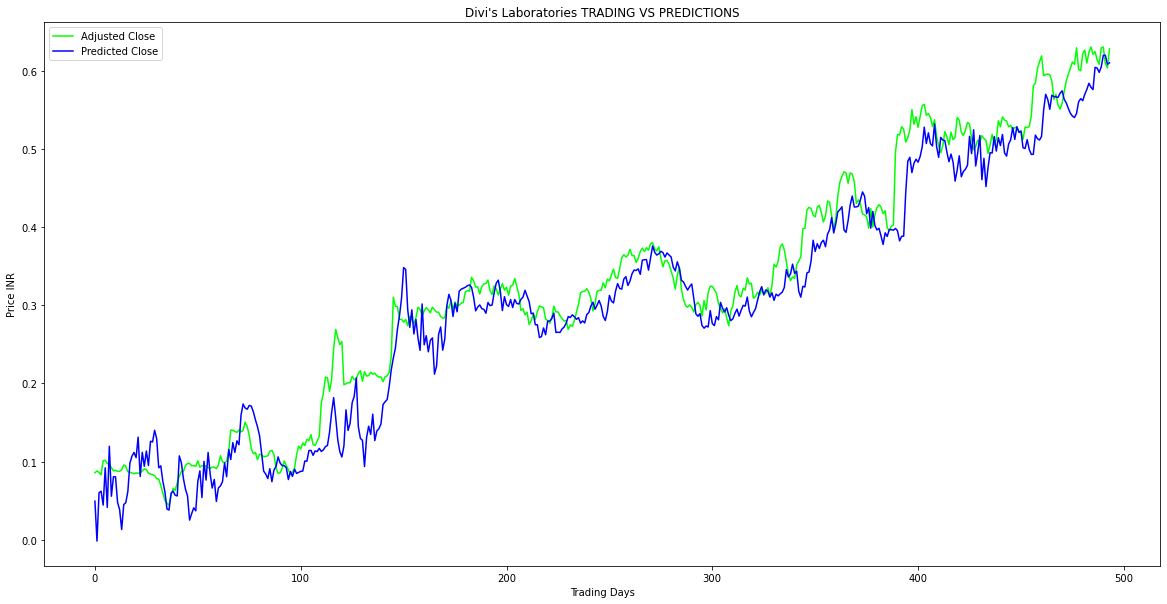

Standard Deviation of Error :  0.22048183679663688
Denormalised Standard Deviation :  437.1272896330123
Ratio of Standard Deviation of Error to Standard Deviation of Stock Price :  1.2019405690425613
Train Score: 0.00161024 MSE (0.04012779 RMSE)
Test Score: 0.00155057 MSE (0.03937729 RMSE)
Epoch 1/50
63/63 [==============================] - 4s 39ms/step - loss: 0.0157 - val_loss: 0.0033
Epoch 2/50
63/63 [==============================] - 2s 30ms/step - loss: 0.0031 - val_loss: 0.0051
Epoch 3/50
63/63 [==============================] - 2s 29ms/step - loss: 0.0037 - val_loss: 0.0037
Epoch 4/50
63/63 [==============================] - 2s 29ms/step - loss: 0.0025 - val_loss: 0.0024
Epoch 5/50
63/63 [==============================] - 2s 30ms/step - loss: 0.0020 - val_loss: 0.0024
Epoch 6/50
63/63 [==============================] - 2s 30ms/step - loss: 0.0029 - val_loss: 0.0023
Epoch 7/50
63/63 [==============================] - 2s 35ms/step - loss: 0.0021 - val_loss: 0.0024
Epoch 8/50
63/63

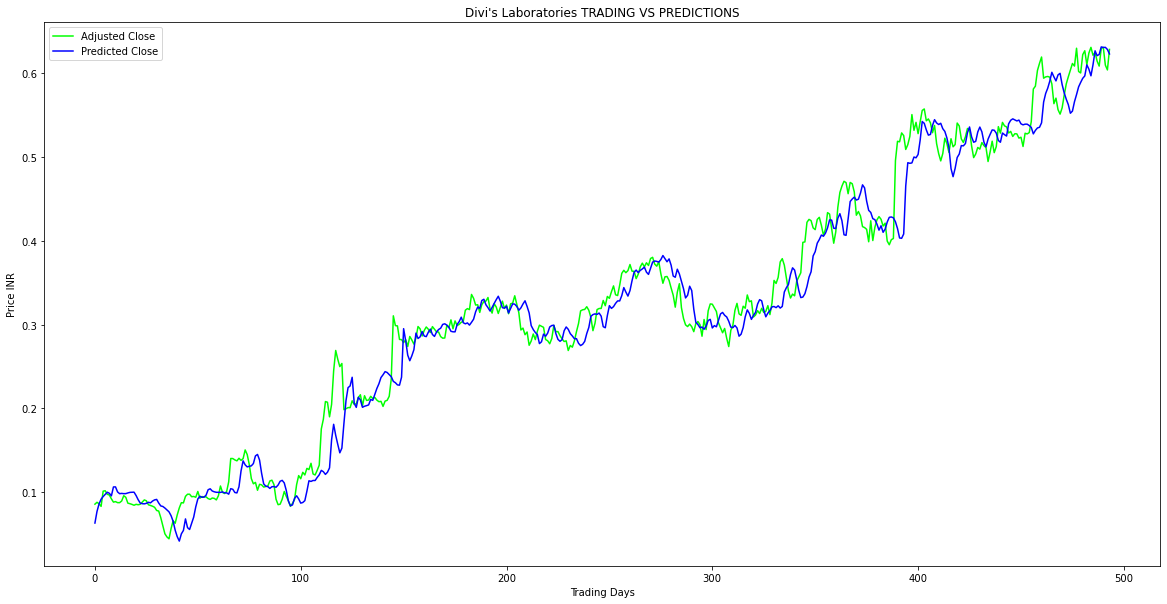

Standard Deviation of Error :  0.2226157648670249
Denormalised Standard Deviation :  441.3580154253636
Ratio of Standard Deviation of Error to Standard Deviation of Stock Price :  1.213573521472941
Train Score: 0.00127969 MSE (0.03577272 RMSE)
Test Score: 0.00081211 MSE (0.02849747 RMSE)
Epoch 1/50
63/63 [==============================] - 5s 39ms/step - loss: 0.0166 - val_loss: 0.0024
Epoch 2/50
63/63 [==============================] - 2s 28ms/step - loss: 0.0016 - val_loss: 0.0021
Epoch 3/50
63/63 [==============================] - 2s 30ms/step - loss: 0.0018 - val_loss: 0.0024
Epoch 4/50
63/63 [==============================] - 2s 29ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 5/50
63/63 [==============================] - 2s 29ms/step - loss: 0.0019 - val_loss: 0.0020
Epoch 6/50
63/63 [==============================] - 2s 29ms/step - loss: 0.0026 - val_loss: 0.0020
Epoch 7/50
63/63 [==============================] - 2s 29ms/step - loss: 0.0015 - val_loss: 0.0019
Epoch 8/50
63/63 [

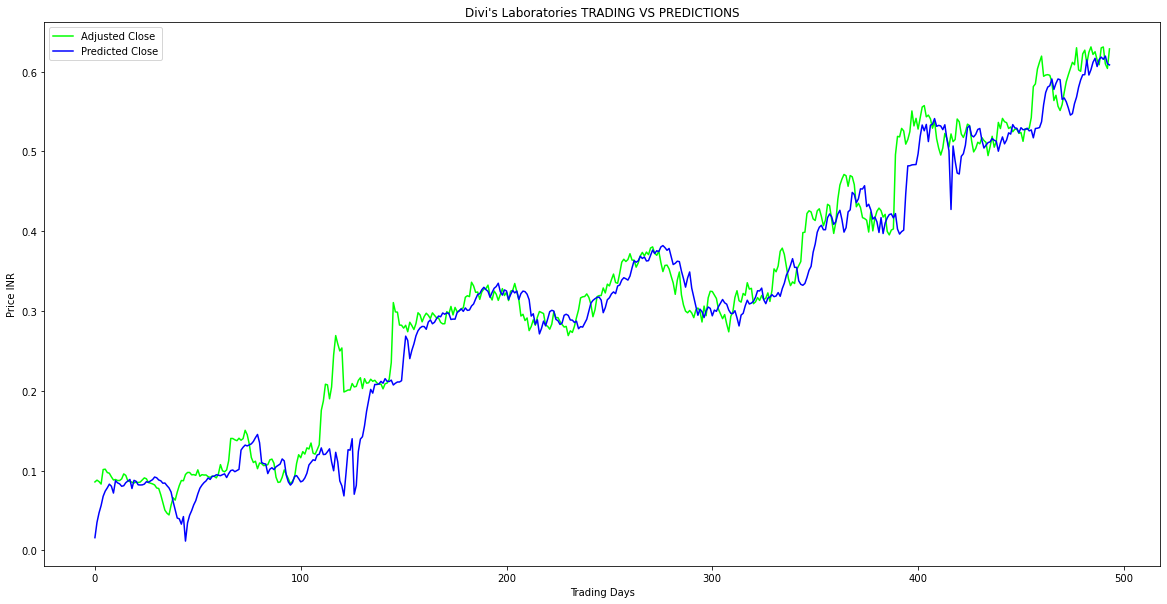

Standard Deviation of Error :  0.22473262644433373
Denormalised Standard Deviation :  445.55490518853605
Ratio of Standard Deviation of Error to Standard Deviation of Stock Price :  1.225113437167501
Train Score: 0.00160945 MSE (0.04011799 RMSE)
Test Score: 0.00133046 MSE (0.03647541 RMSE)


In [5]:
#TRAIN_SIMPLE_RNN_MODEL
model = build_model(input_dim = x_train.shape[-1], output_dim = unroll_length, return_sequences=True)
model.compile(loss = "mean_squared_error", optimizer = 'Adam')
model.fit(x_train, y_train, epochs =50, validation_split = 0.05)

preds = model.predict(x_test)
plot_prediction(y_test, preds)
err_stat(y_test,preds)

trainScore = model.evaluate(x_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(x_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

#TRAIN_LSTM_MODEL
lstm_model = build_lstm_model(x_train.shape[-1], unroll_length, return_sequences = True)
lstm_model.compile(loss = "mean_squared_error", optimizer = 'Adam')
lstm_model.fit(x_train, y_train, epochs = 50, validation_split = 0.05)

preds_lstm = lstm_model.predict(x_test)
plot_prediction(y_test, preds_lstm)
err_stat(y_test,preds_lstm)

trainScore = lstm_model.evaluate(x_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = lstm_model.evaluate(x_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))


#TRAIN_GRU_MODEL
gru_model = build_gru_model(x_train.shape[-1], unroll_length, return_sequences = True)
gru_model.compile(loss = "mean_squared_error", optimizer = 'Adam')
gru_model.fit(x_train, y_train, epochs = 50, validation_split = 0.05)

preds_gru = gru_model.predict(x_test)
plot_prediction(y_test, preds_gru)
err_stat(y_test,preds_gru)

trainScore = gru_model.evaluate(x_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = gru_model.evaluate(x_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

